# Data Exploration and Visualizations

*Data Exploration* is the process where a Data Scientist gathers information 
from a dataset. This inclues knowing the source of the data, an understading 
of what the data itself represents, the features that describe the data, the type 
of data in each feature, and what stories comes out from the data. 

Data visualisation is the most agile method to acquire information from a dataset.




## Data Type Foundation

In general there are two main data types: numerical and categorical. 
Numerical data can be represented as discrete or continuous forms, 
oredered by intervals, or enclosed in range where in such case can be 
normalized to have zero as the minimum and 1 as the maximum. Categorical
data can be nominal or ordinal. The main difference between the two is
that nominal does not have an order but instead it serves as an indicator
while ordinal does follow an order.

In [152]:
# load libraries


# data handlers
import numpy as np
import pandas as pd


# visualization stuffs
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
shirts_list = [
    ('lacoste', 'green', 'xl', 50), 
    ('lacoste', 'white', 'sm', 50), 
    ('puma', 'blue', 'l', 30), 
    ('puma', 'black', 'm', 30), 
    ('polo', 'yellow', 'm', 23), 
    ('polo', 'white', 'l', 25)
]

In [147]:
df_shirts = pd.DataFrame(shirts_list, columns=['brand', 'color', 'size', 'price'])

In [148]:
df_shirts

,brand,color,size,price
0,lacoste,green,xl,50
1,lacoste,white,sm,50
2,puma,blue,l,30
3,puma,black,m,30
4,polo,yellow,m,23
5,polo,white,l,25


### Ordinal Data

In [149]:
size_dict = {'sm': 1, 'm': 2, 'l': 3, 'xl': 4}

In [150]:
df_shirts['size'] = df_shirts['size'].map(size_dict)

In [151]:
df_shirts

,brand,color,size,price
0,lacoste,green,4,50
1,lacoste,white,1,50
2,puma,blue,3,30
3,puma,black,2,30
4,polo,yellow,2,23
5,polo,white,3,25


### Nominal Data

In [155]:
pd.get_dummies(df_shirts, prefix=['brand', 'color'])

,size,price,brand_lacoste,brand_polo,brand_puma,color_black,color_blue,color_green,color_white,color_yellow
0,4,50,1,0,0,0,0,1,0,0
1,1,50,1,0,0,0,0,0,1,0
2,3,30,0,0,1,0,1,0,0,0
3,2,30,0,0,1,1,0,0,0,0
4,2,23,0,1,0,0,0,0,0,1
5,3,25,0,1,0,0,0,0,1,0


In [156]:
pd.get_dummies(df_shirts, prefix=['brand', 'color'], drop_first=True)

,size,price,brand_polo,brand_puma,color_blue,color_green,color_white,color_yellow
0,4,50,0,0,0,1,0,0
1,1,50,0,0,0,0,1,0
2,3,30,0,1,1,0,0,0
3,2,30,0,1,0,0,0,0
4,2,23,1,0,0,0,0,1
5,3,25,1,0,0,0,1,0


# Explore the AirBNB NYC Data

In [341]:
%%html
<img src='./new-york-city-airbnb-open-data/New_York_City_.png', width=500, height=500>

In [157]:
airbnb_csv = './new-york-city-airbnb-open-data/AB_NYC_2019.csv'

In [174]:
df = pd.read_csv(airbnb_csv)

In [175]:
df.shape

(48895, 16)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [178]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [179]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [187]:
len(df['name'].unique())

47906

In [188]:
len(df['neighbourhood'].unique())

221

In [192]:
df['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [185]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [180]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [181]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [182]:
# sorted(df['neighbourhood'].unique().tolist())

In [183]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [193]:
cols_drop_list = ['id', 'name', 'host_id', 'host_name', 
                  'neighbourhood', 'latitude', 'longitude', 
                  'last_review', 'reviews_per_month']

In [195]:
df = df.drop(cols_drop_list, axis=1)

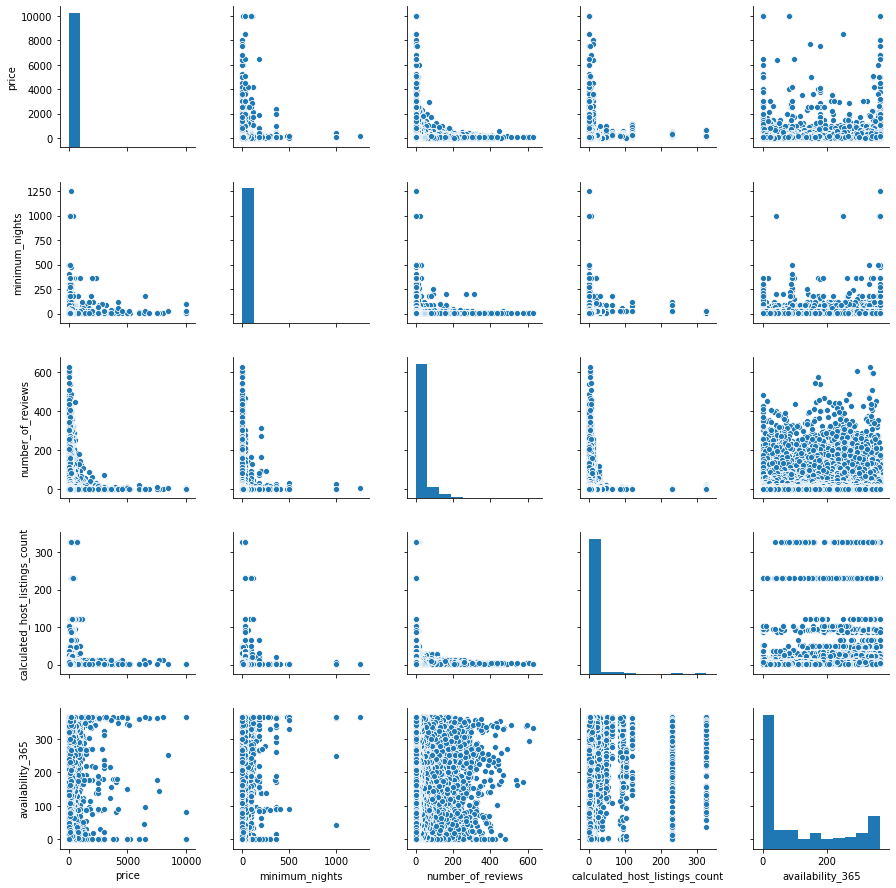

In [196]:
sns.pairplot(df)

## Descriptive Statistics

If you are not familiar with Statistics, this 10 minutes [video](https://www.youtube.com/watch?v=QoQbR4lVLrs) covers everything you need to know.

In [198]:
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [274]:
df['price'].var()

57674.02524696084

In [212]:
df.groupby('neighbourhood_group').sum()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,
Bronx,95459,4976,28371,2437,180843
Brooklyn,2500600,121761,486574,45925,2015070
Manhattan,4264527,185833,454569,277073,2425586
Queens,563867,29358,156950,23005,818464
Staten Island,42825,1802,11541,865,74480


In [213]:
df.groupby('neighbourhood_group').count()

,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,
Bronx,1091,1091,1091,1091,1091,1091
Brooklyn,20104,20104,20104,20104,20104,20104
Manhattan,21661,21661,21661,21661,21661,21661
Queens,5666,5666,5666,5666,5666,5666
Staten Island,373,373,373,373,373,373


## Visualization

### Bar Charts

#### Bar Charts, Example 1

In [208]:
names_list = df.groupby('neighbourhood_group').sum()['price'].index.tolist()

In [209]:
values_list = df.groupby('neighbourhood_group').sum()['price'].values.tolist()

Text(0.5, 1.0, 'AirBNB Total Price')

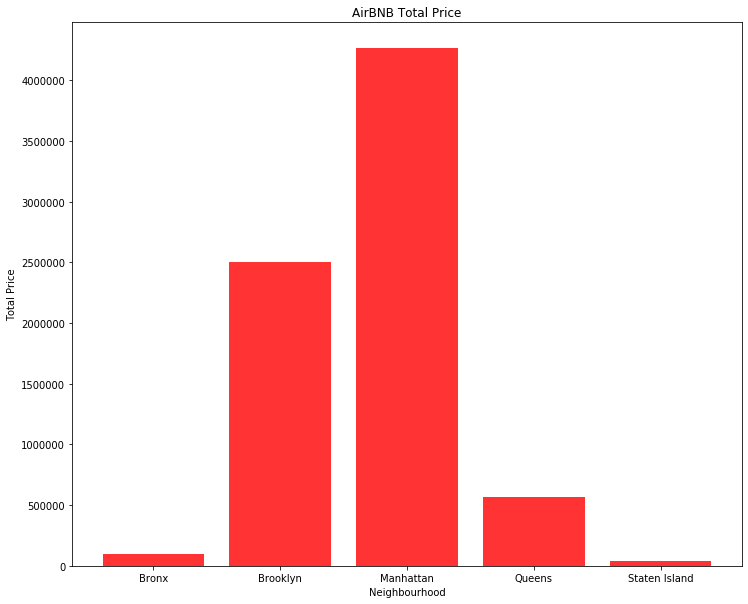

In [236]:
# bar chart
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(np.arange(len(values_list)), values_list, align='center', alpha=0.8, color='red')
plt.xticks(np.arange(len(names_list)), names_list)
plt.ylabel('Total Price')
plt.xlabel('Neighbourhood')
plt.title('AirBNB Total Price')

#### Bar Charts, Practice 1:

Create a bar chart to display the total price by the `room_type`.

In [225]:
# create room type list of index
names_list2 = df.groupby('room_type').sum()['price'].index.tolist()


# create the room type list of values
values_list2 = df.groupby('room_type').sum()['price'].values.tolist()

Text(0.5, 1.0, 'AirBNB Total Price')

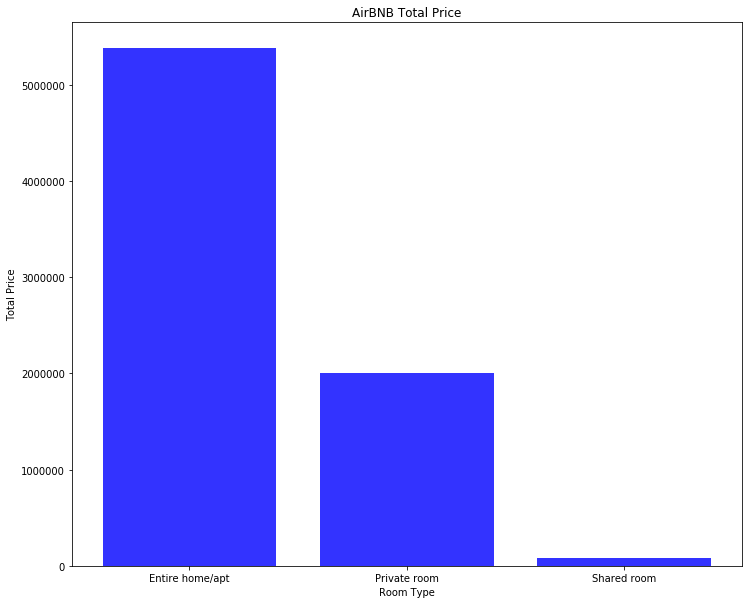

In [342]:
# # bar chart
# fig, ax = plt.subplots(figsize=(12, 10))

# # your code goes here


# plt.ylabel('Total Price')
# plt.xlabel('Room Type')
# plt.title('AirBNB Total Price')

Text(0.5, 1.0, 'AirBNB Total Price')

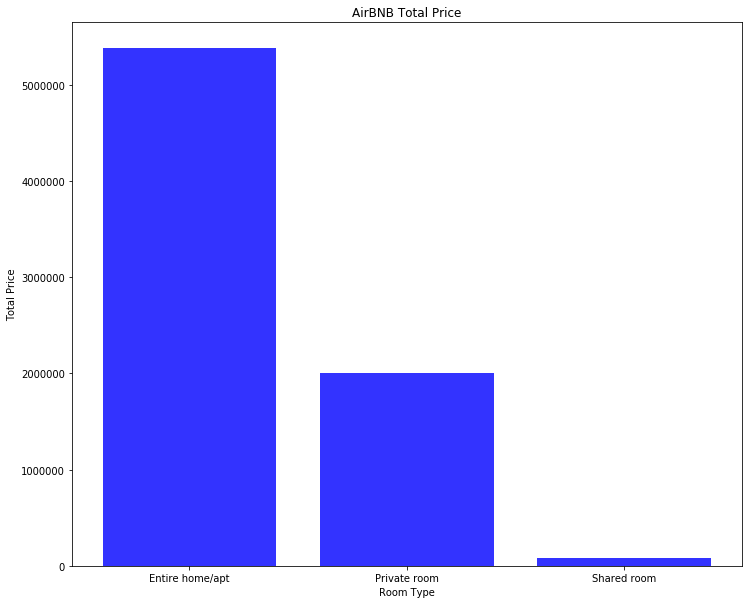

In [237]:
# bar chart
fig, ax = plt.subplots(figsize=(12, 10))

# Final Answer
plt.bar(np.arange(len(values_list2)), values_list2, align='center', alpha=0.8, color='blue')
plt.xticks(np.arange(len(names_list2)), names_list2)
plt.ylabel('Total Price')
plt.xlabel('Room Type')
plt.title('AirBNB Total Price')

Similarly we can creqte bar charts that have more information than the one we just created. In fact, we can combine both bar charts.

#### Bar Charts, Example 2

In [256]:
names_bk_list = df[df['neighbourhood_group'] == 'Brooklyn'].groupby('room_type').sum()['price'].index.tolist()
values_bk_list = df[df['neighbourhood_group'] == 'Brooklyn'].groupby('room_type').sum()['price'].values.tolist()

names_mn_list = df[df['neighbourhood_group'] == 'Manhattan'].groupby('room_type').sum()['price'].index.tolist()
values_mn_list = df[df['neighbourhood_group'] == 'Manhattan'].groupby('room_type').sum()['price'].values.tolist()

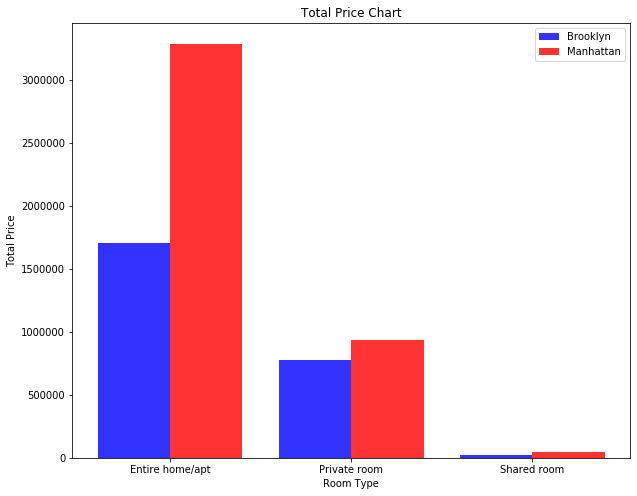

In [315]:
# create bar chart
bar_width = 0.4


fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(np.arange(len(values_bk_list)), values_bk_list, 
        bar_width, alpha=0.8, color='blue', label='Brooklyn')

plt.bar(np.arange(len(values_mn_list))+bar_width, values_mn_list, 
        bar_width, alpha=0.8, color='red', label='Manhattan')

plt.xlabel('Room Type')
plt.ylabel('Total Price')
plt.title('Total Price Chart')
plt.xticks(np.arange(len(names_mn_list))+0.2, names_mn_list)
plt.legend()
plt.show()

#### Bar Charts, Practice 2

Complete the bar chart above by adding Statent Island, Bronx and Queens.

In [265]:
# create the list of value for Staten Island
values_si_list = df[df['neighbourhood_group'] == 'Staten Island'].groupby('room_type').sum()['price'].values.tolist()

In [266]:
# create the list of values for Bronx
values_bx_list = df[df['neighbourhood_group'] == 'Bronx'].groupby('room_type').sum()['price'].values.tolist()

In [267]:
# create the list of values for Queens
values_qn_list = df[df['neighbourhood_group'] == 'Queens'].groupby('room_type').sum()['price'].values.tolist()

In [276]:
# # create bar chart
# bar_width = 0.15


# fig, ax = plt.subplots(figsize=(10, 8))

# plt.bar(np.arange(len(values_bk_list)), values_bk_list, 
#         bar_width, alpha=0.8, color='blue', label='Brooklyn')

# plt.bar(np.arange(len(values_mn_list))+bar_width, values_mn_list, 
#         bar_width, alpha=0.8, color='red', label='Manhattan')

# plt.bar(np.arange(len(values_si_list))+2*bar_width, values_si_list, 
#         bar_width, alpha=0.8, color='purple', label='Staten Island')

# # bar chart for Bronx in color green
# # your code goes here


# # bar chart for Queens in color brown
# # your code goes here



# plt.xlabel('Room Type')
# plt.ylabel('Total Price')
# plt.title('Total Price Chart')
# plt.xticks(np.arange(len(names_mn_list))+2*bar_width, names_mn_list)
# plt.legend()
# plt.show()

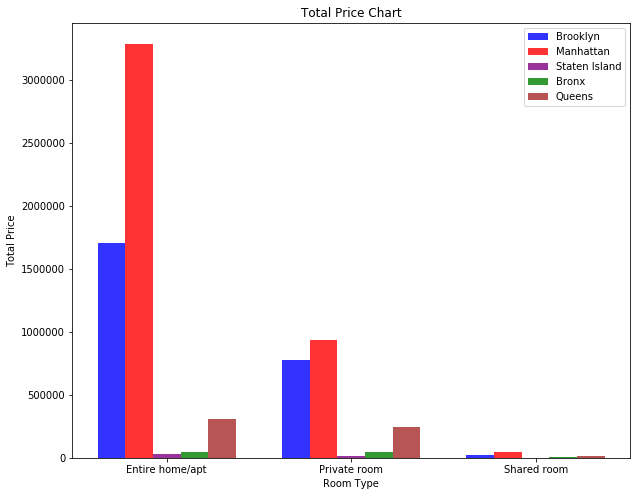

In [275]:
# Final Answer
# create bar chart
bar_width = 0.15


fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(np.arange(len(values_bk_list)), values_bk_list, 
        bar_width, alpha=0.8, color='blue', label='Brooklyn')

plt.bar(np.arange(len(values_mn_list))+bar_width, values_mn_list, 
        bar_width, alpha=0.8, color='red', label='Manhattan')

plt.bar(np.arange(len(values_si_list))+2*bar_width, values_si_list, 
        bar_width, alpha=0.8, color='purple', label='Staten Island')

# bar chart for Bronx in color green
plt.bar(np.arange(len(values_bx_list))+3*bar_width, values_bx_list, 
        bar_width, alpha=0.8, color='green', label='Bronx')

# bar chart for Queens in color brown
plt.bar(np.arange(len(values_qn_list))+4*bar_width, values_qn_list, 
        bar_width, alpha=0.8, color='brown', label='Queens')

plt.xlabel('Room Type')
plt.ylabel('Total Price')
plt.title('Total Price Chart')
plt.xticks(np.arange(len(names_mn_list))+2*bar_width, names_mn_list)
plt.legend()
plt.show()

### Histogram


#### Histogram Example 1, Pandas

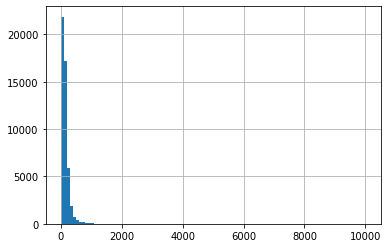

In [318]:
# create a histogram using pandas of `number_of_reviews`

df['price'].hist(bins=100)


#### Histogram Practice 1, Pandas

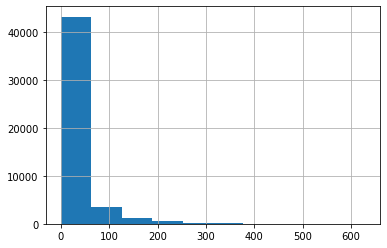

In [313]:
# create a histogram using pandas of `number_of_reviews` with 50 bins

# your code goes here

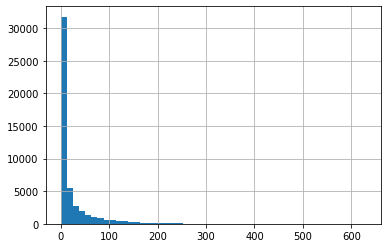

In [319]:
# create a histogram using pandas of `number_of_reviews`

# Final Answer
df['number_of_reviews'].hist(bins=50)


#### Histogram Example 1, Matplotlib

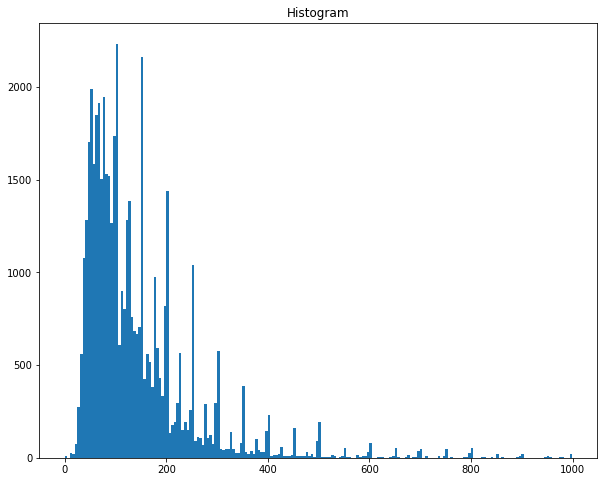

In [307]:
# using matplotlib
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df[df['price'] < 1000]['price'], bins=200)
plt.title('Histogram')
plt.xlabel('Price Range')
plt.ylabel()
plt.show()


#### Histogram Practice 1, Matplotlib

In [323]:
# # create a bar chart of number of reviews under 50 reviews and 50 bins

# fig, ax = plt.subplots(figsize=(10,8))
# # your code goes here


# plt.xlabel('Reviews Range')
# plt.ylabel('Count of Reviews Range')
# plt.show()

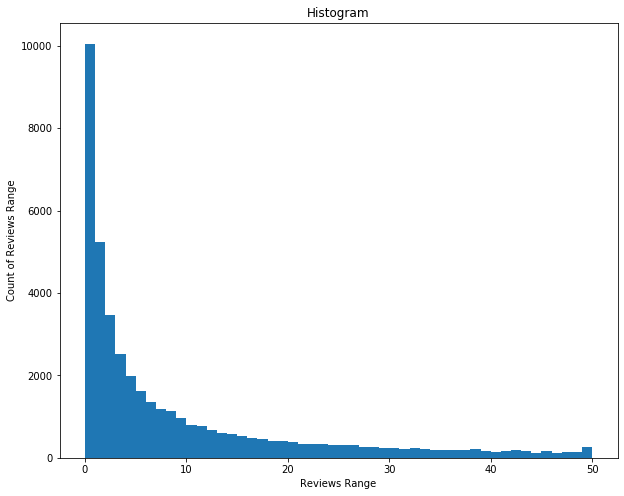

In [322]:
# create a bar chart of number of reviews under 50 reviews and 50 bins
# Final Answer
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(df[df['number_of_reviews'] <51]['number_of_reviews'], bins=50)
plt.title('Histogram')
plt.xlabel('Reviews Range')
plt.ylabel('Count of Reviews Range')
plt.show()

### Whisker Plots


A Whisker plot is useful as an indicator to show the skewness of a distribution and there exist any potential outliers. For more info click [here](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.htm) or [here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review).

#### Whisker Plot, Example 1

In [331]:
df[df['price'] <501]['price'].describe()

count    47851.000000
mean       131.530564
std         88.063220
min          0.000000
25%         68.000000
50%        100.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

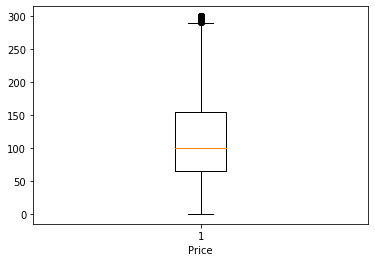

In [335]:
plt.boxplot(df[df['price'] <301]['price'])
plt.xlabel('Price')
plt.show()

#### Whisker Plot, Practice 1

In [340]:
# # make a whisker plot of `number_of_reviews` below 51 reviwes

# # your code goes here

# plt.xlabel('Price')
# plt.show()

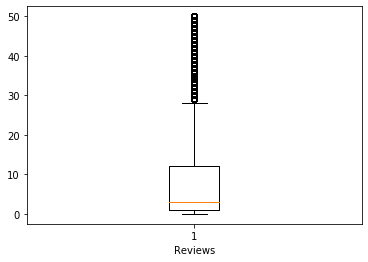

In [339]:
# make a whisker plot of `number_of_reviews` below 51 reviwes

# Final Answer
plt.boxplot(df[df['number_of_reviews'] <51]['number_of_reviews'])
plt.xlabel('Reviews')
plt.show()

#### Whisker Plot, Example 2

In [343]:
df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
4,Manhattan,Entire home/apt,80,10,9,1,0


In [348]:
df_bk = df[df['neighbourhood_group'] == 'Brooklyn']
df_mn = df[df['neighbourhood_group'] == 'Manhattan']

In [384]:
bn_mn_list = [df_bk[df_bk['price'] <501]['price'], df_mn[df_mn['price'] <501]['price']]
bn_mn_names = ['Brooklyn', 'Manhattan']

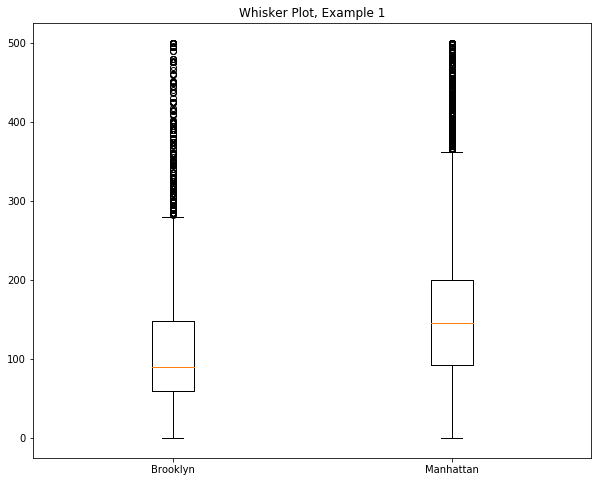

In [385]:
# simple eample 1
fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(bn_mn_list)
plt.xticks(np.arange(len(bn_mn_names))+1, bn_mn_names)
plt.title('Whisker Plot, Example 1')
plt.show()

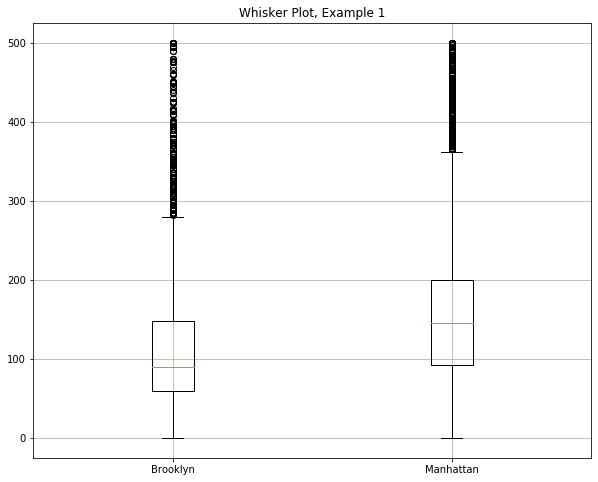

In [386]:
# example with grid
fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(bn_mn_list)
plt.xticks(np.arange(len(bn_mn_names))+1, bn_mn_names)
plt.title('Whisker Plot, Example 1')
plt.grid()
plt.show()

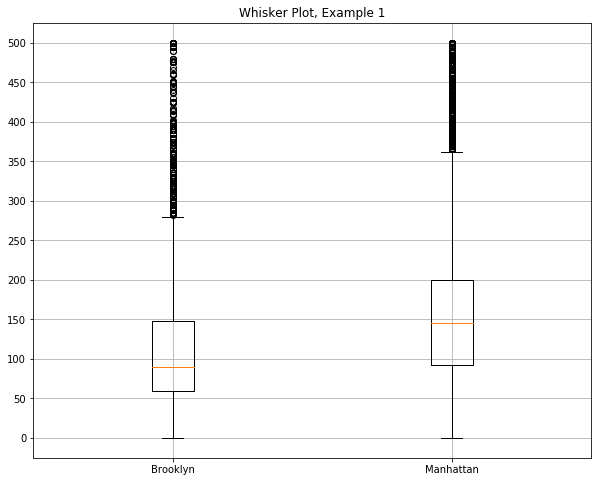

In [387]:
# example with grid customized
fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(bn_mn_list)
plt.xticks(np.arange(len(bn_mn_names))+1, bn_mn_names)
plt.title('Whisker Plot, Example 1')
plt.grid()
plt.yticks(np.arange(0, 550, 50))
plt.show()

#### Whisker Plot, Practice 2

In [374]:
df_bx = df[df['neighbourhood_group'] == 'Bronx']
df_qn = df[df['neighbourhood_group'] == 'Queens']
df_si = df[df['neighbourhood_group'] == 'Staten Island']

In [376]:
df_bx.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
171,Bronx,Private room,40,1,219,3,353
207,Bronx,Private room,45,1,138,3,323
260,Bronx,Private room,90,2,0,7,349
261,Bronx,Entire home/apt,105,2,38,13,365
309,Bronx,Entire home/apt,90,30,4,2,346


In [378]:
df_qn.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
46,Queens,Private room,130,3,248,1,215
77,Queens,Private room,70,30,25,1,324
143,Queens,Private room,140,2,1,1,1
161,Queens,Private room,79,30,28,1,126
181,Queens,Entire home/apt,350,8,10,5,365


In [379]:
df_si.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
169,Staten Island,Private room,70,2,166,1,312
249,Staten Island,Private room,36,2,193,6,360
250,Staten Island,Private room,37,2,147,6,0
251,Staten Island,Private room,37,2,177,6,320
256,Staten Island,Private room,36,2,333,6,340


In [380]:
df_bk.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,6,365
3,Brooklyn,Entire home/apt,89,1,270,1,194
6,Brooklyn,Private room,60,45,49,1,0
12,Brooklyn,Private room,89,4,167,3,314
15,Brooklyn,Entire home/apt,140,2,148,1,46


In [381]:
df_mn.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,Manhattan,Entire home/apt,225,1,45,2,355
2,Manhattan,Private room,150,3,0,1,365
4,Manhattan,Entire home/apt,80,10,9,1,0
5,Manhattan,Entire home/apt,200,3,74,1,129
7,Manhattan,Private room,79,2,430,1,220


In [382]:
main_list = [
    df_bk[df_bk['price'] <501]['price'], 
    df_mn[df_mn['price'] <501]['price'], 
    df_bx[df_bx['price'] <501]['price'], 
    df_qn[df_qn['price'] <501]['price'], 
    df_si[df_si['price'] <501]['price']
]

names_list = ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']

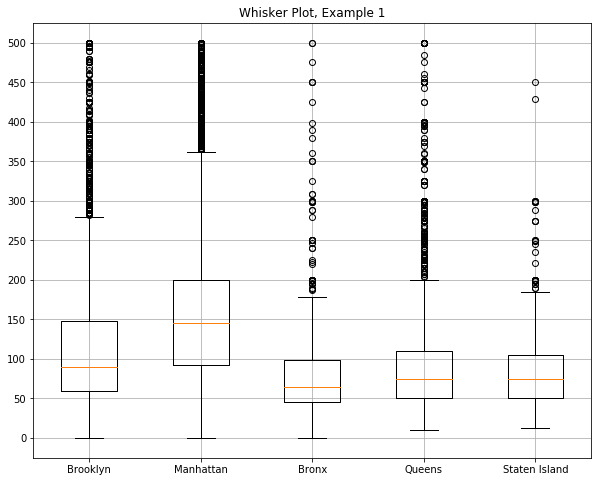

In [383]:
# example with grid customized
fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(main_list)
plt.xticks(np.arange(len(names_list))+1, names_list)
plt.title('Whisker Plot, Example 1')
plt.grid()
plt.yticks(np.arange(0, 550, 50))
plt.show()

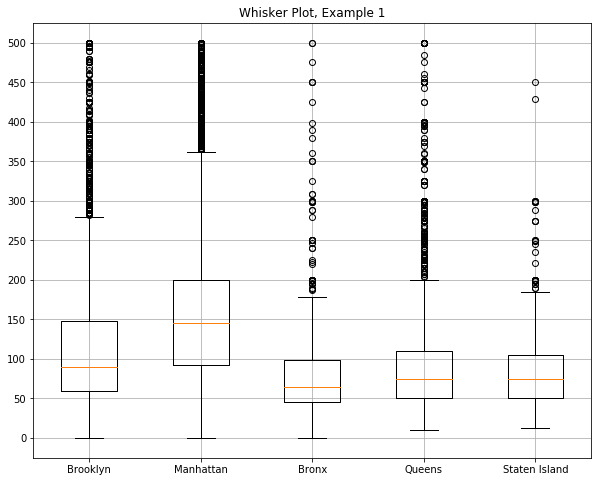

In [388]:
# example with grid customized

# Final Answer
fig, ax = plt.subplots(figsize=(10, 8))
plt.boxplot(main_list)
plt.xticks(np.arange(len(names_list))+1, names_list)
plt.title('Whisker Plot, Example 1')
plt.grid()
plt.yticks(np.arange(0, 550, 50))
plt.show()

In [389]:
df.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.225701,1.000000


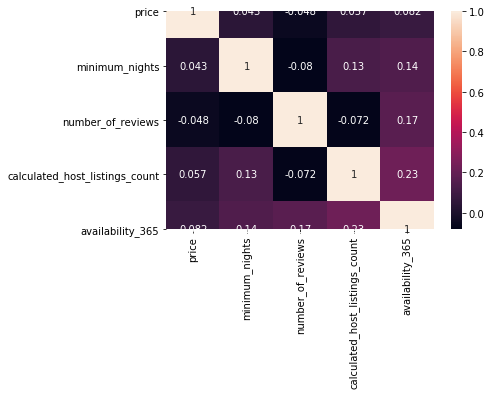

In [393]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Explore the Heart Dataset

In [394]:
df = pd.read_csv('heart.csv')

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [396]:
df.shape

(303, 14)

In [398]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


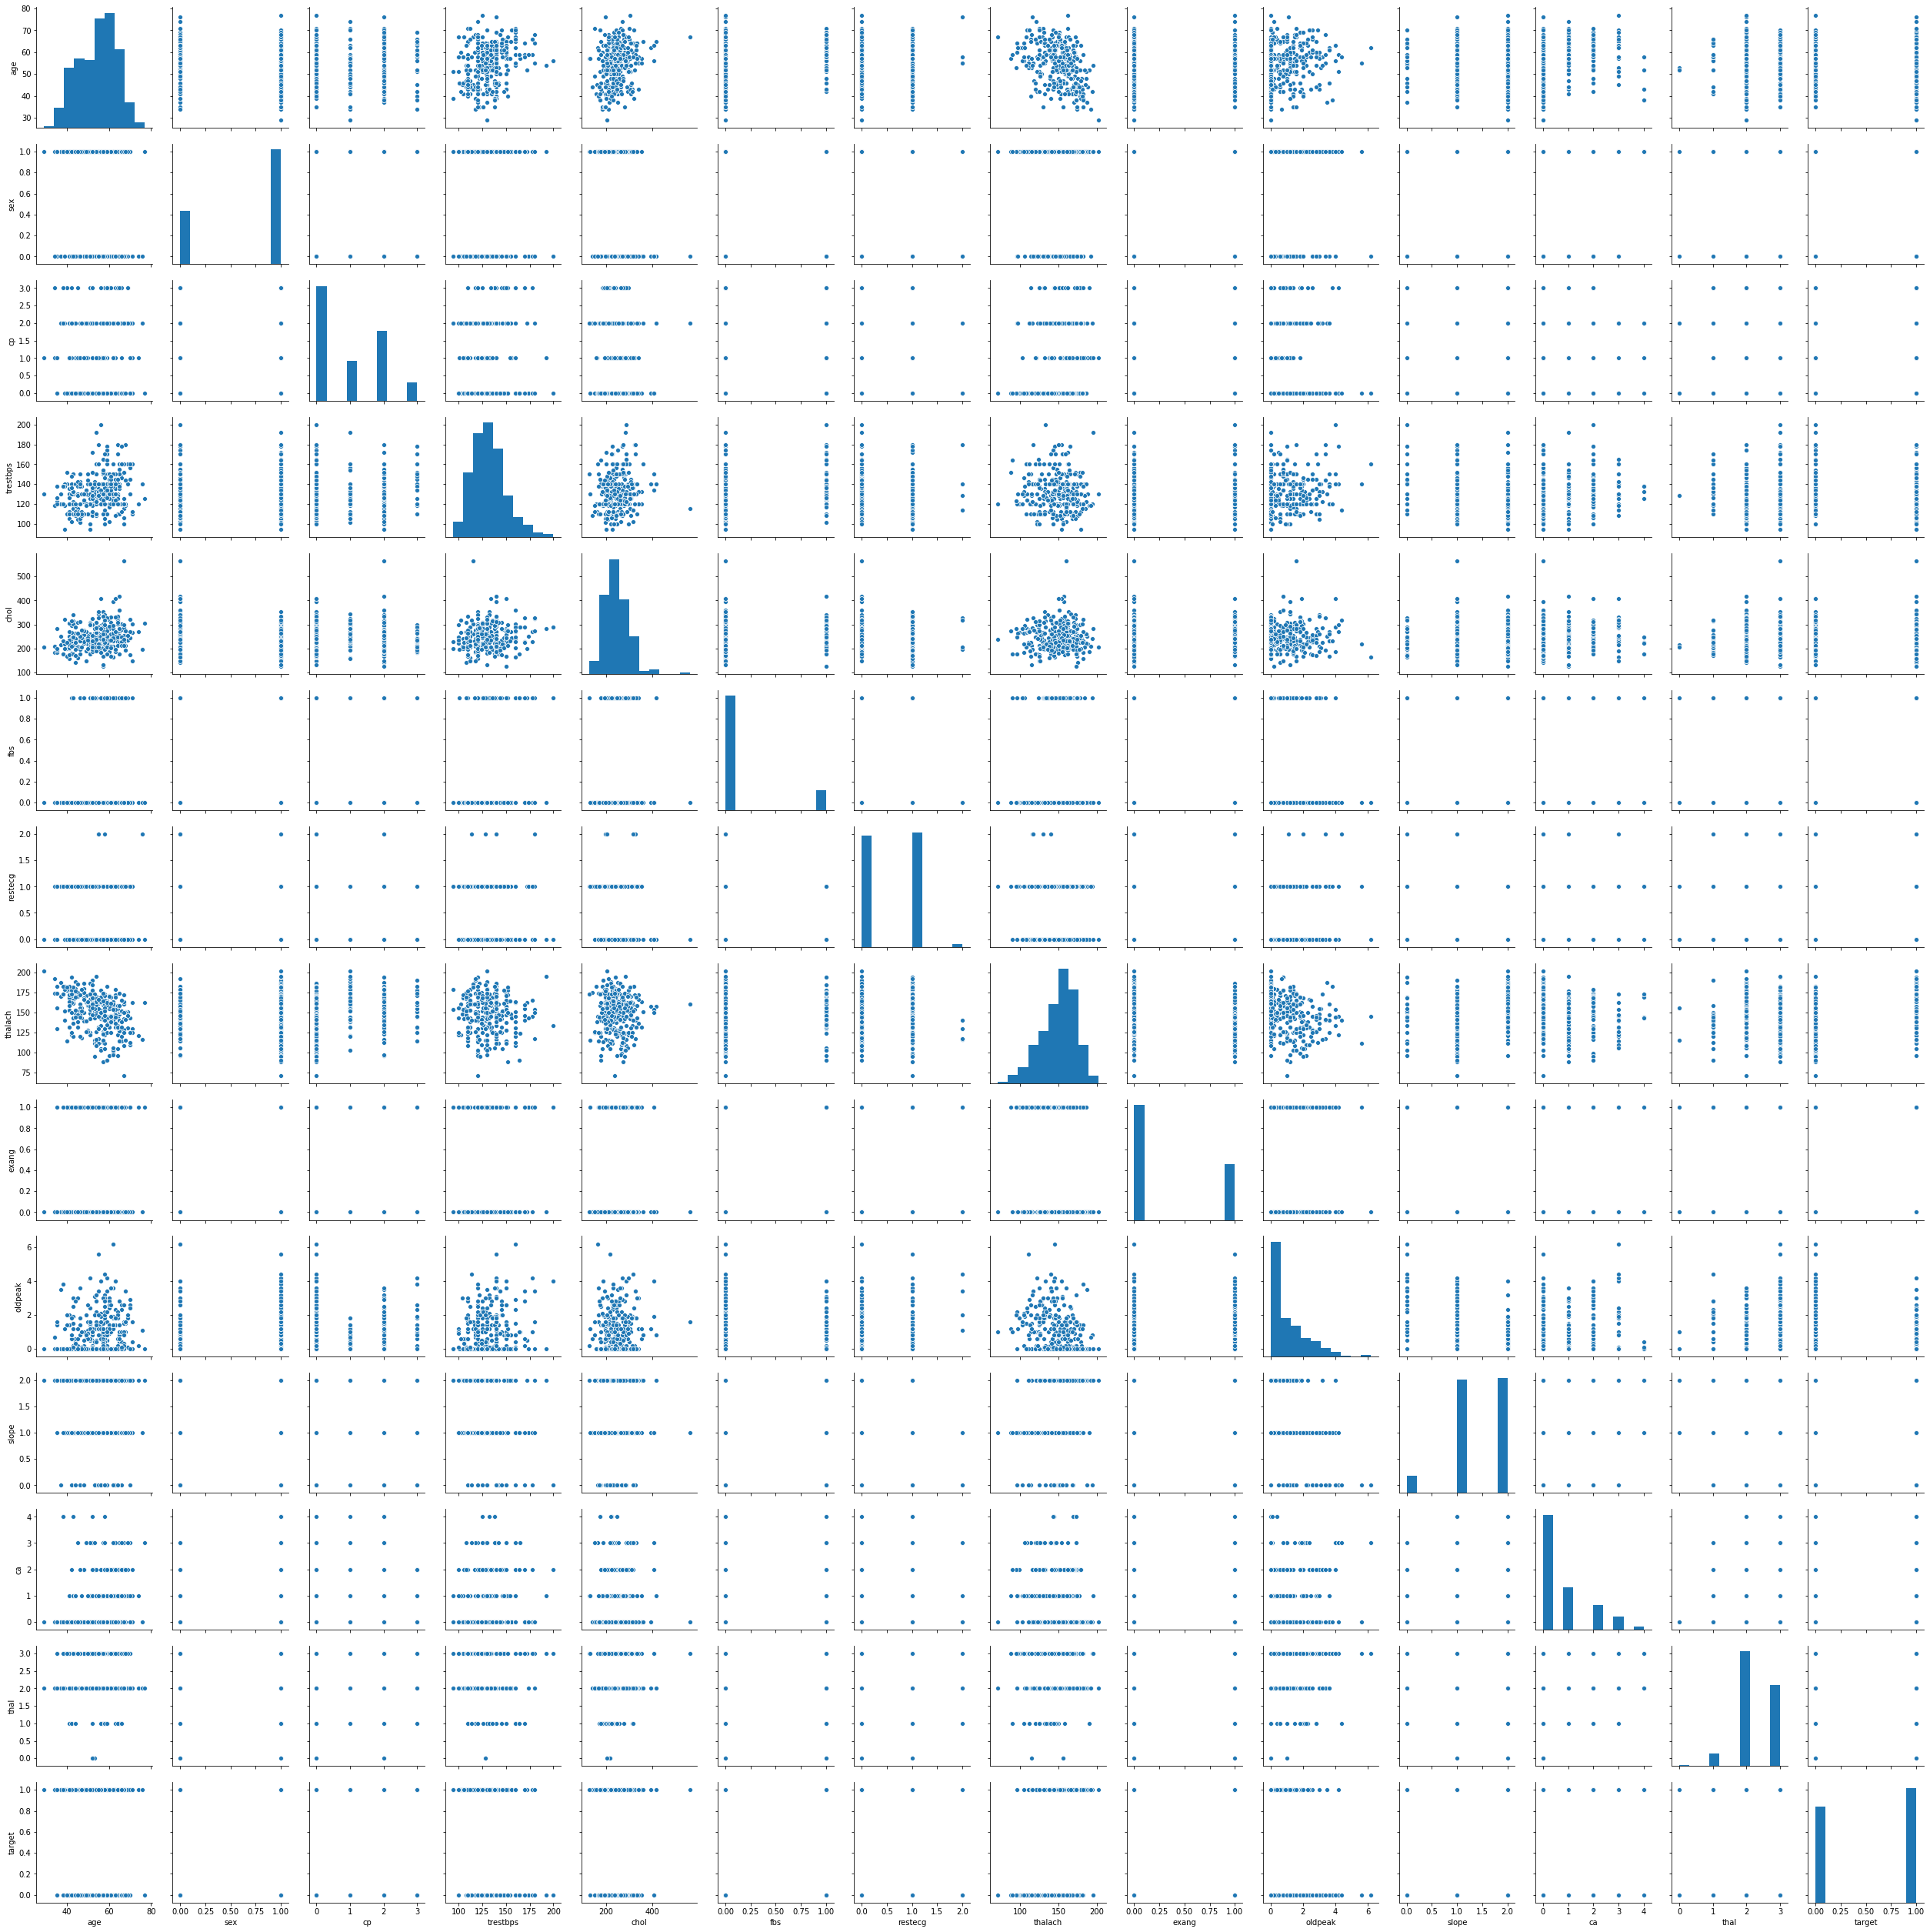

In [397]:
sns.pairplot(df)

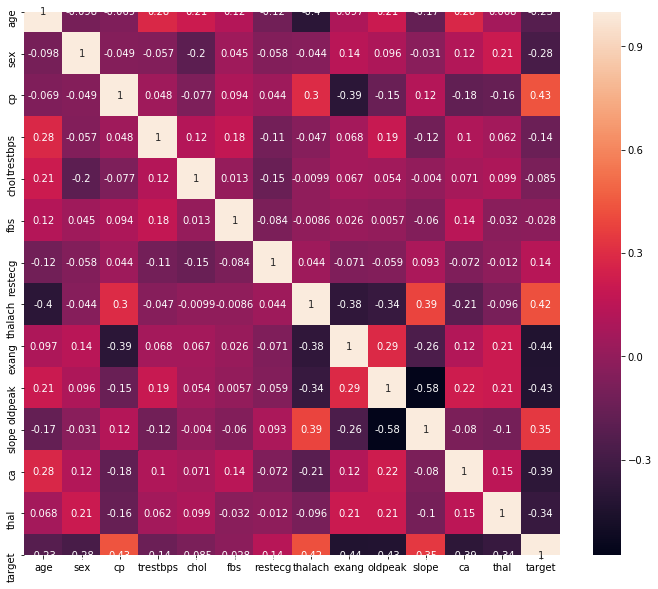

In [403]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()